# Heart Failure Prediction

### **About this dataset**  
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### **Credits**  
    
#### *Citation*  
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). (link)

#### *License*  
CC BY 4.0

##### **Import the necessary libraries**

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.robust import mad
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import imblearn
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="is_sparse is deprecated*")
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

##### loading Datasets

The time column is misleading for processing the task

In [42]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv",usecols=lambda column: column != 'time')
df_aim = pd.read_csv("heart_failure_clinical_records_dataset_aim.csv", sep=";")

- **age** = age
- **anaemia** = Reduction in red blood cells or hemoglobin
- **creatinine_phosphokinase** = Level of the CPK enzyme in the blood (mcg/L)
- **diabetes** = If the patient has diabetes
- **ejection_fraction** = Percentage of blood leaving the heart with each contraction (in percent)
- **high_blood_pressure** = whether the patient has high blood pressure
- **platelets** = Platelets in the blood (Kilo plate/ml)
- **serum_creatinine** = Level of serum creatinine in the blood (mg/dL)
- **serum_sodium** = Serum sodium level in the blood (mEq/L)
- **sex** = sex (F=0 ; M=1)
- **smoking** = Smoker
- **DEATH_EVENT** = Death (N=0 ; Y=1)

### understanding the data

In [43]:
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,1


In [44]:
display(df.info())
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


None

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<Figure size 3000x3000 with 0 Axes>

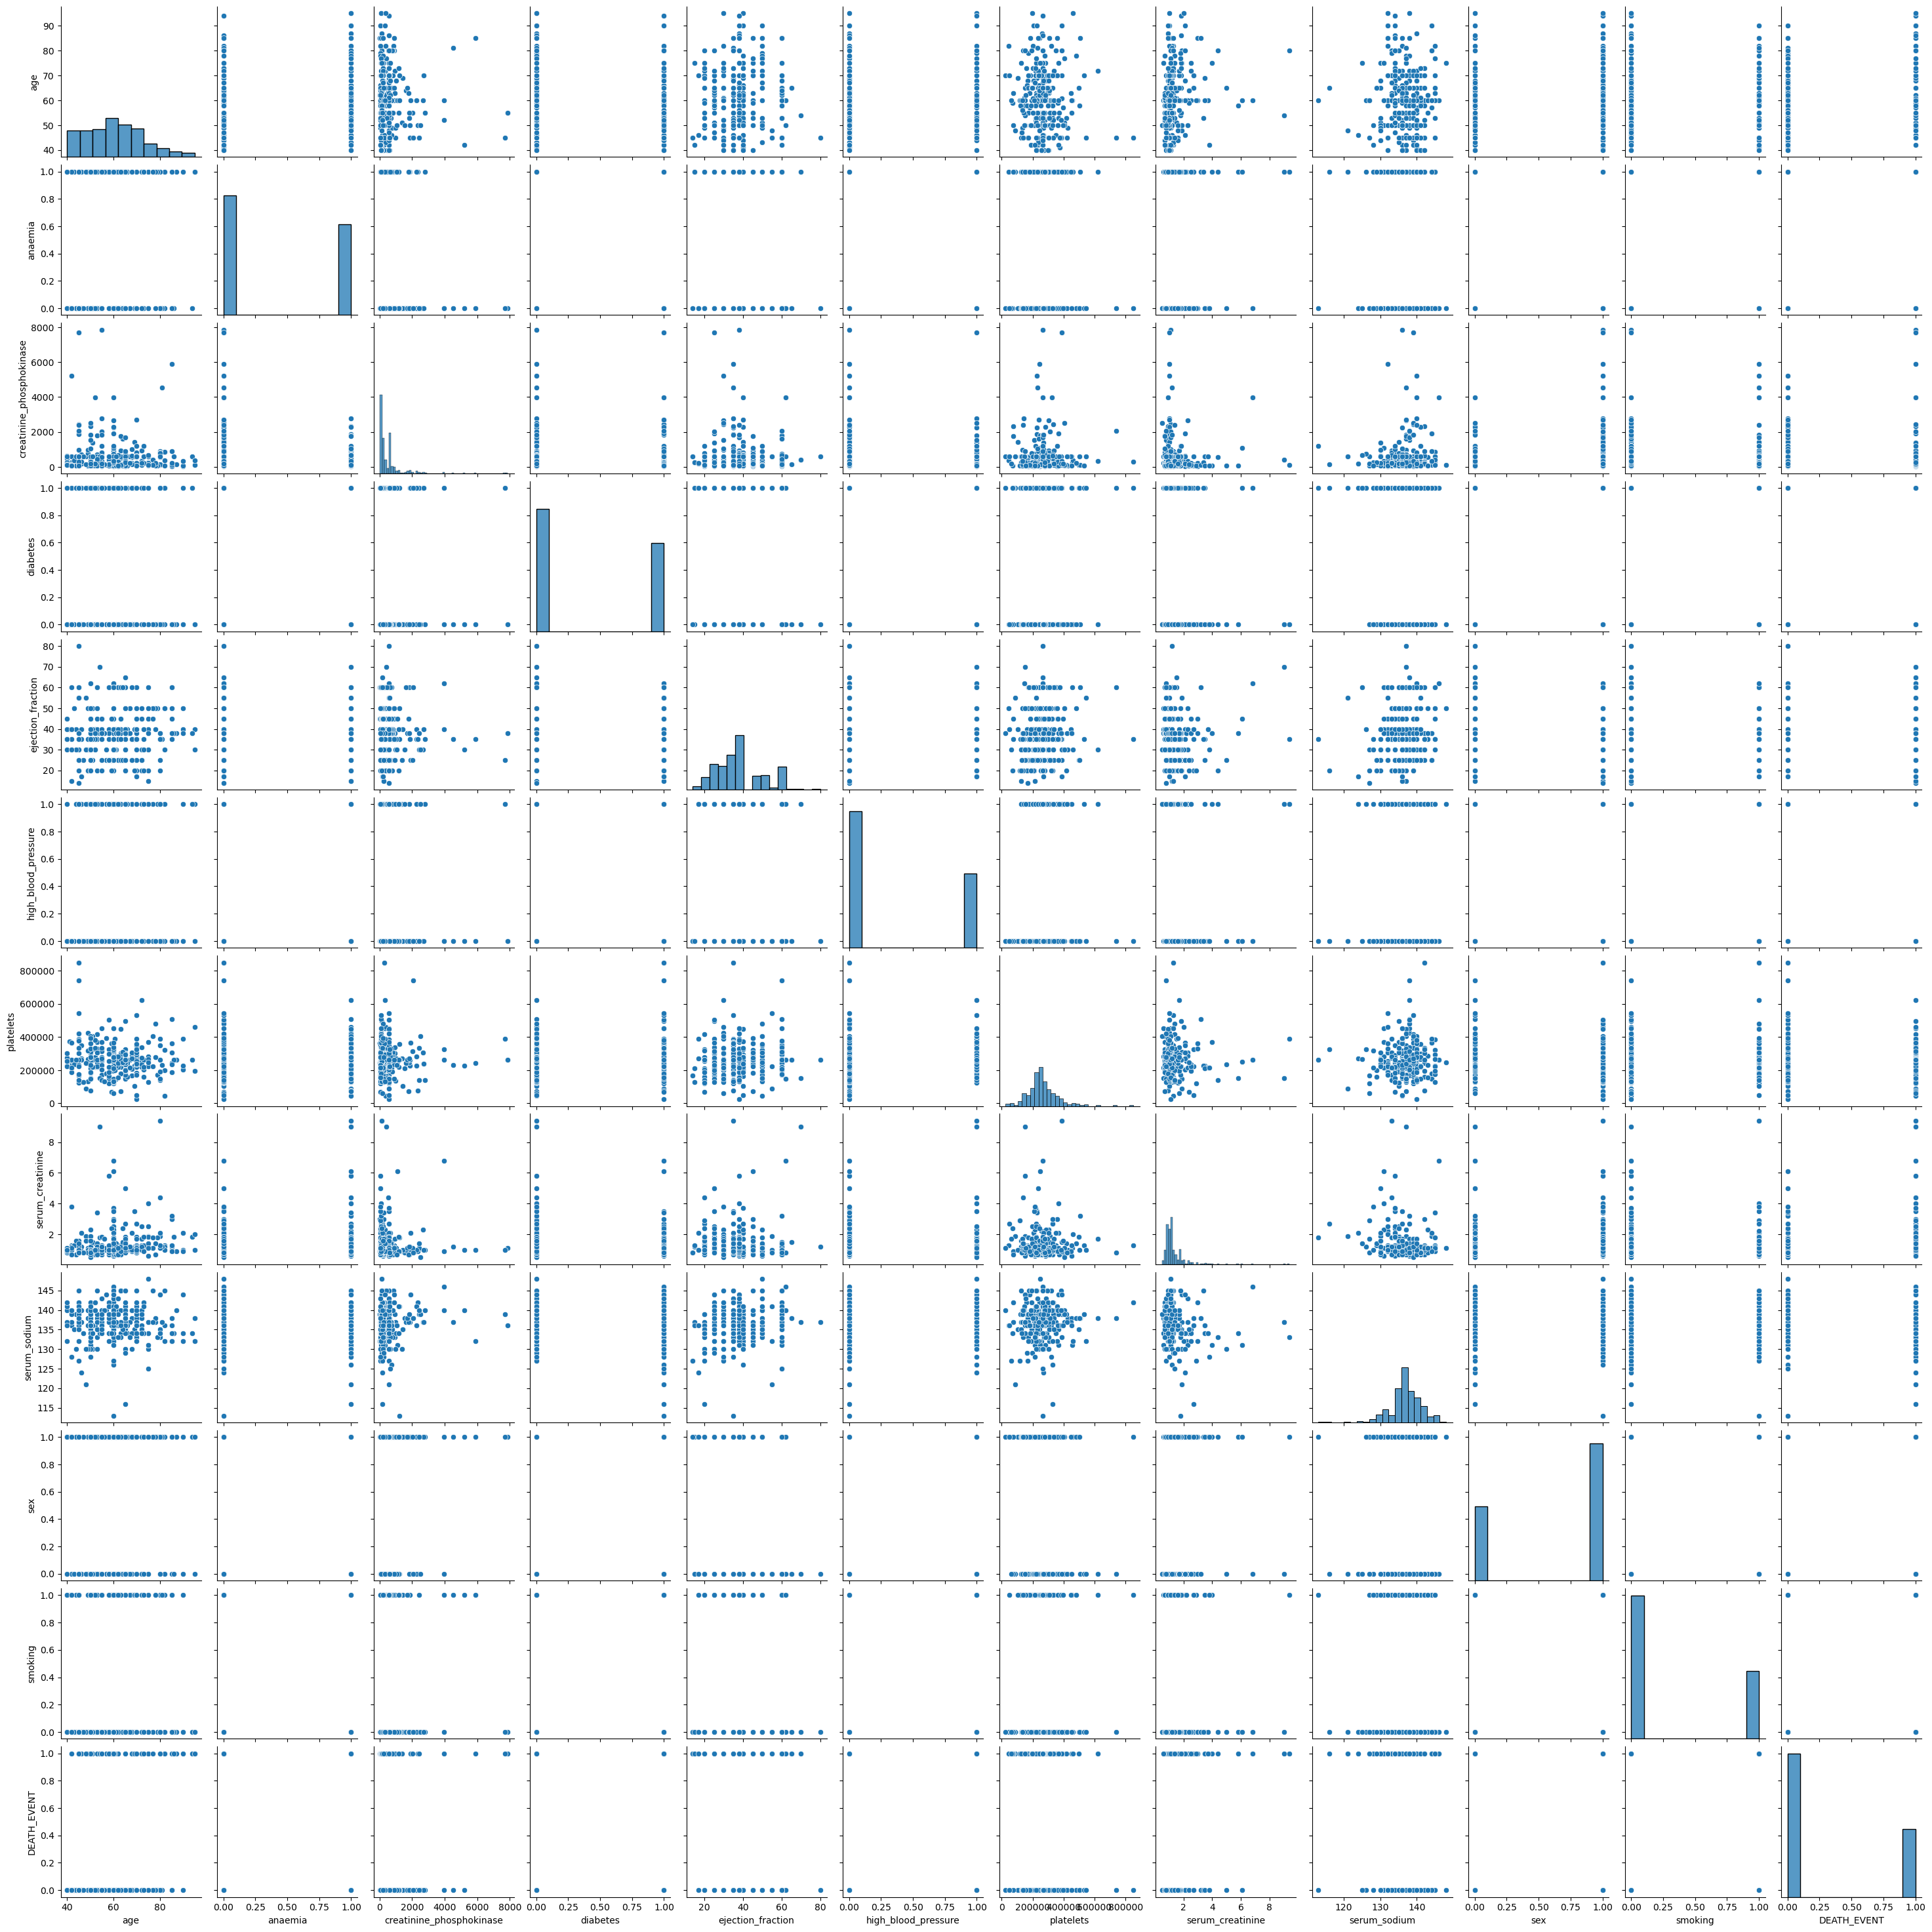

In [45]:
plt.figure(figsize=(30, 30))
sns.pairplot(df)

plt.show()

In [46]:
counters=['anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

for count in counters:
    display(pd.crosstab(index=df[count],columns='count'))
    print("------------------------")

col_0,count
anaemia,
0,170
1,129


------------------------


col_0,count
diabetes,
0,174
1,125


------------------------


col_0,count
high_blood_pressure,
0,194
1,105


------------------------


col_0,count
sex,
0,105
1,194


------------------------


col_0,count
smoking,
0,203
1,96


------------------------


col_0,count
DEATH_EVENT,
0,203
1,96


------------------------


##### Boxplots

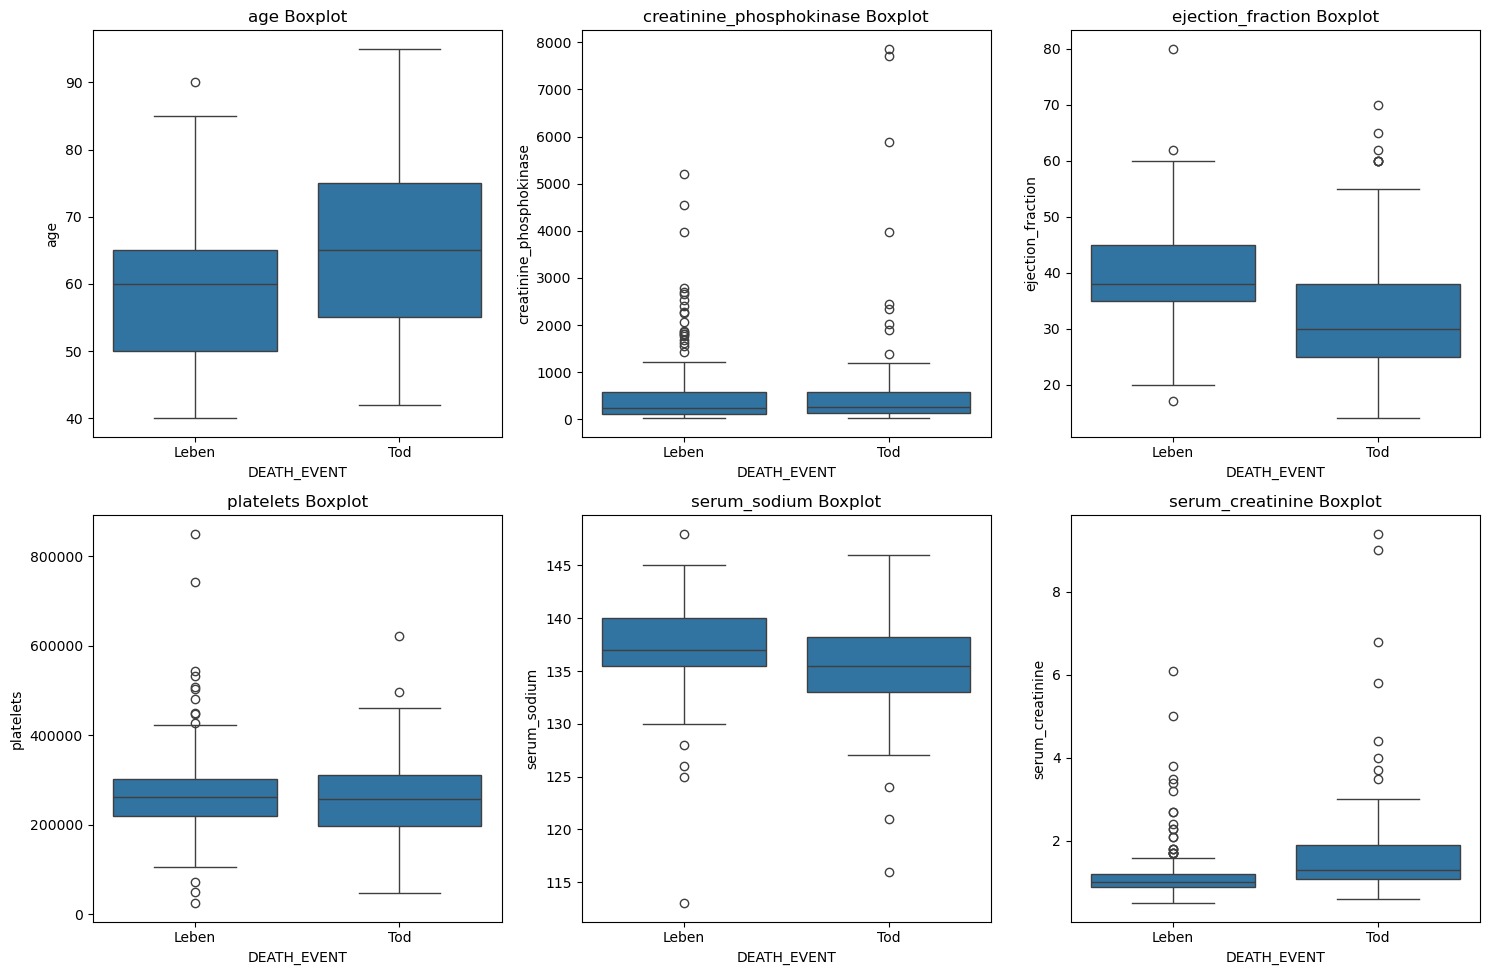

In [47]:
numerics = ['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_sodium', 'serum_creatinine']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Boxplots for every numeric Feature
for i, feature in enumerate(numerics):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    sns.boxplot(x='DEATH_EVENT', y=feature, data=df, ax=ax)
    ax.set_title(f'{feature} Boxplot')
    ax.set_xlabel('DEATH_EVENT')
    ax.set_xticklabels(['Leben', 'Tod'])
    ax.get_figure().suptitle('')

plt.tight_layout()
plt.show()


##### Correlation matrix

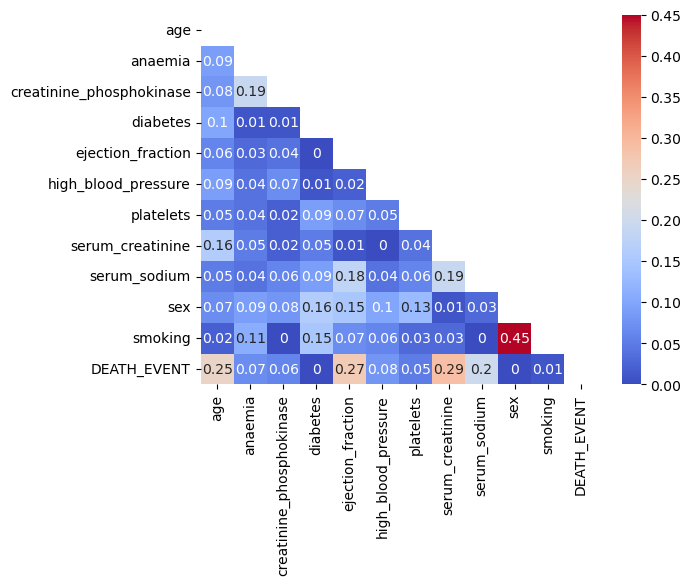

In [48]:
def positive_corr_heatmap(df,round_num=2):

    correlation_matrix = df.corr()

    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    correlation_matrix = correlation_matrix.abs()

    correlation_matrix = correlation_matrix.round(round_num)

    sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm')

positive_corr_heatmap(df)

##### Are there duplicates in the dataset?

In [49]:
df.duplicated().sum()

0

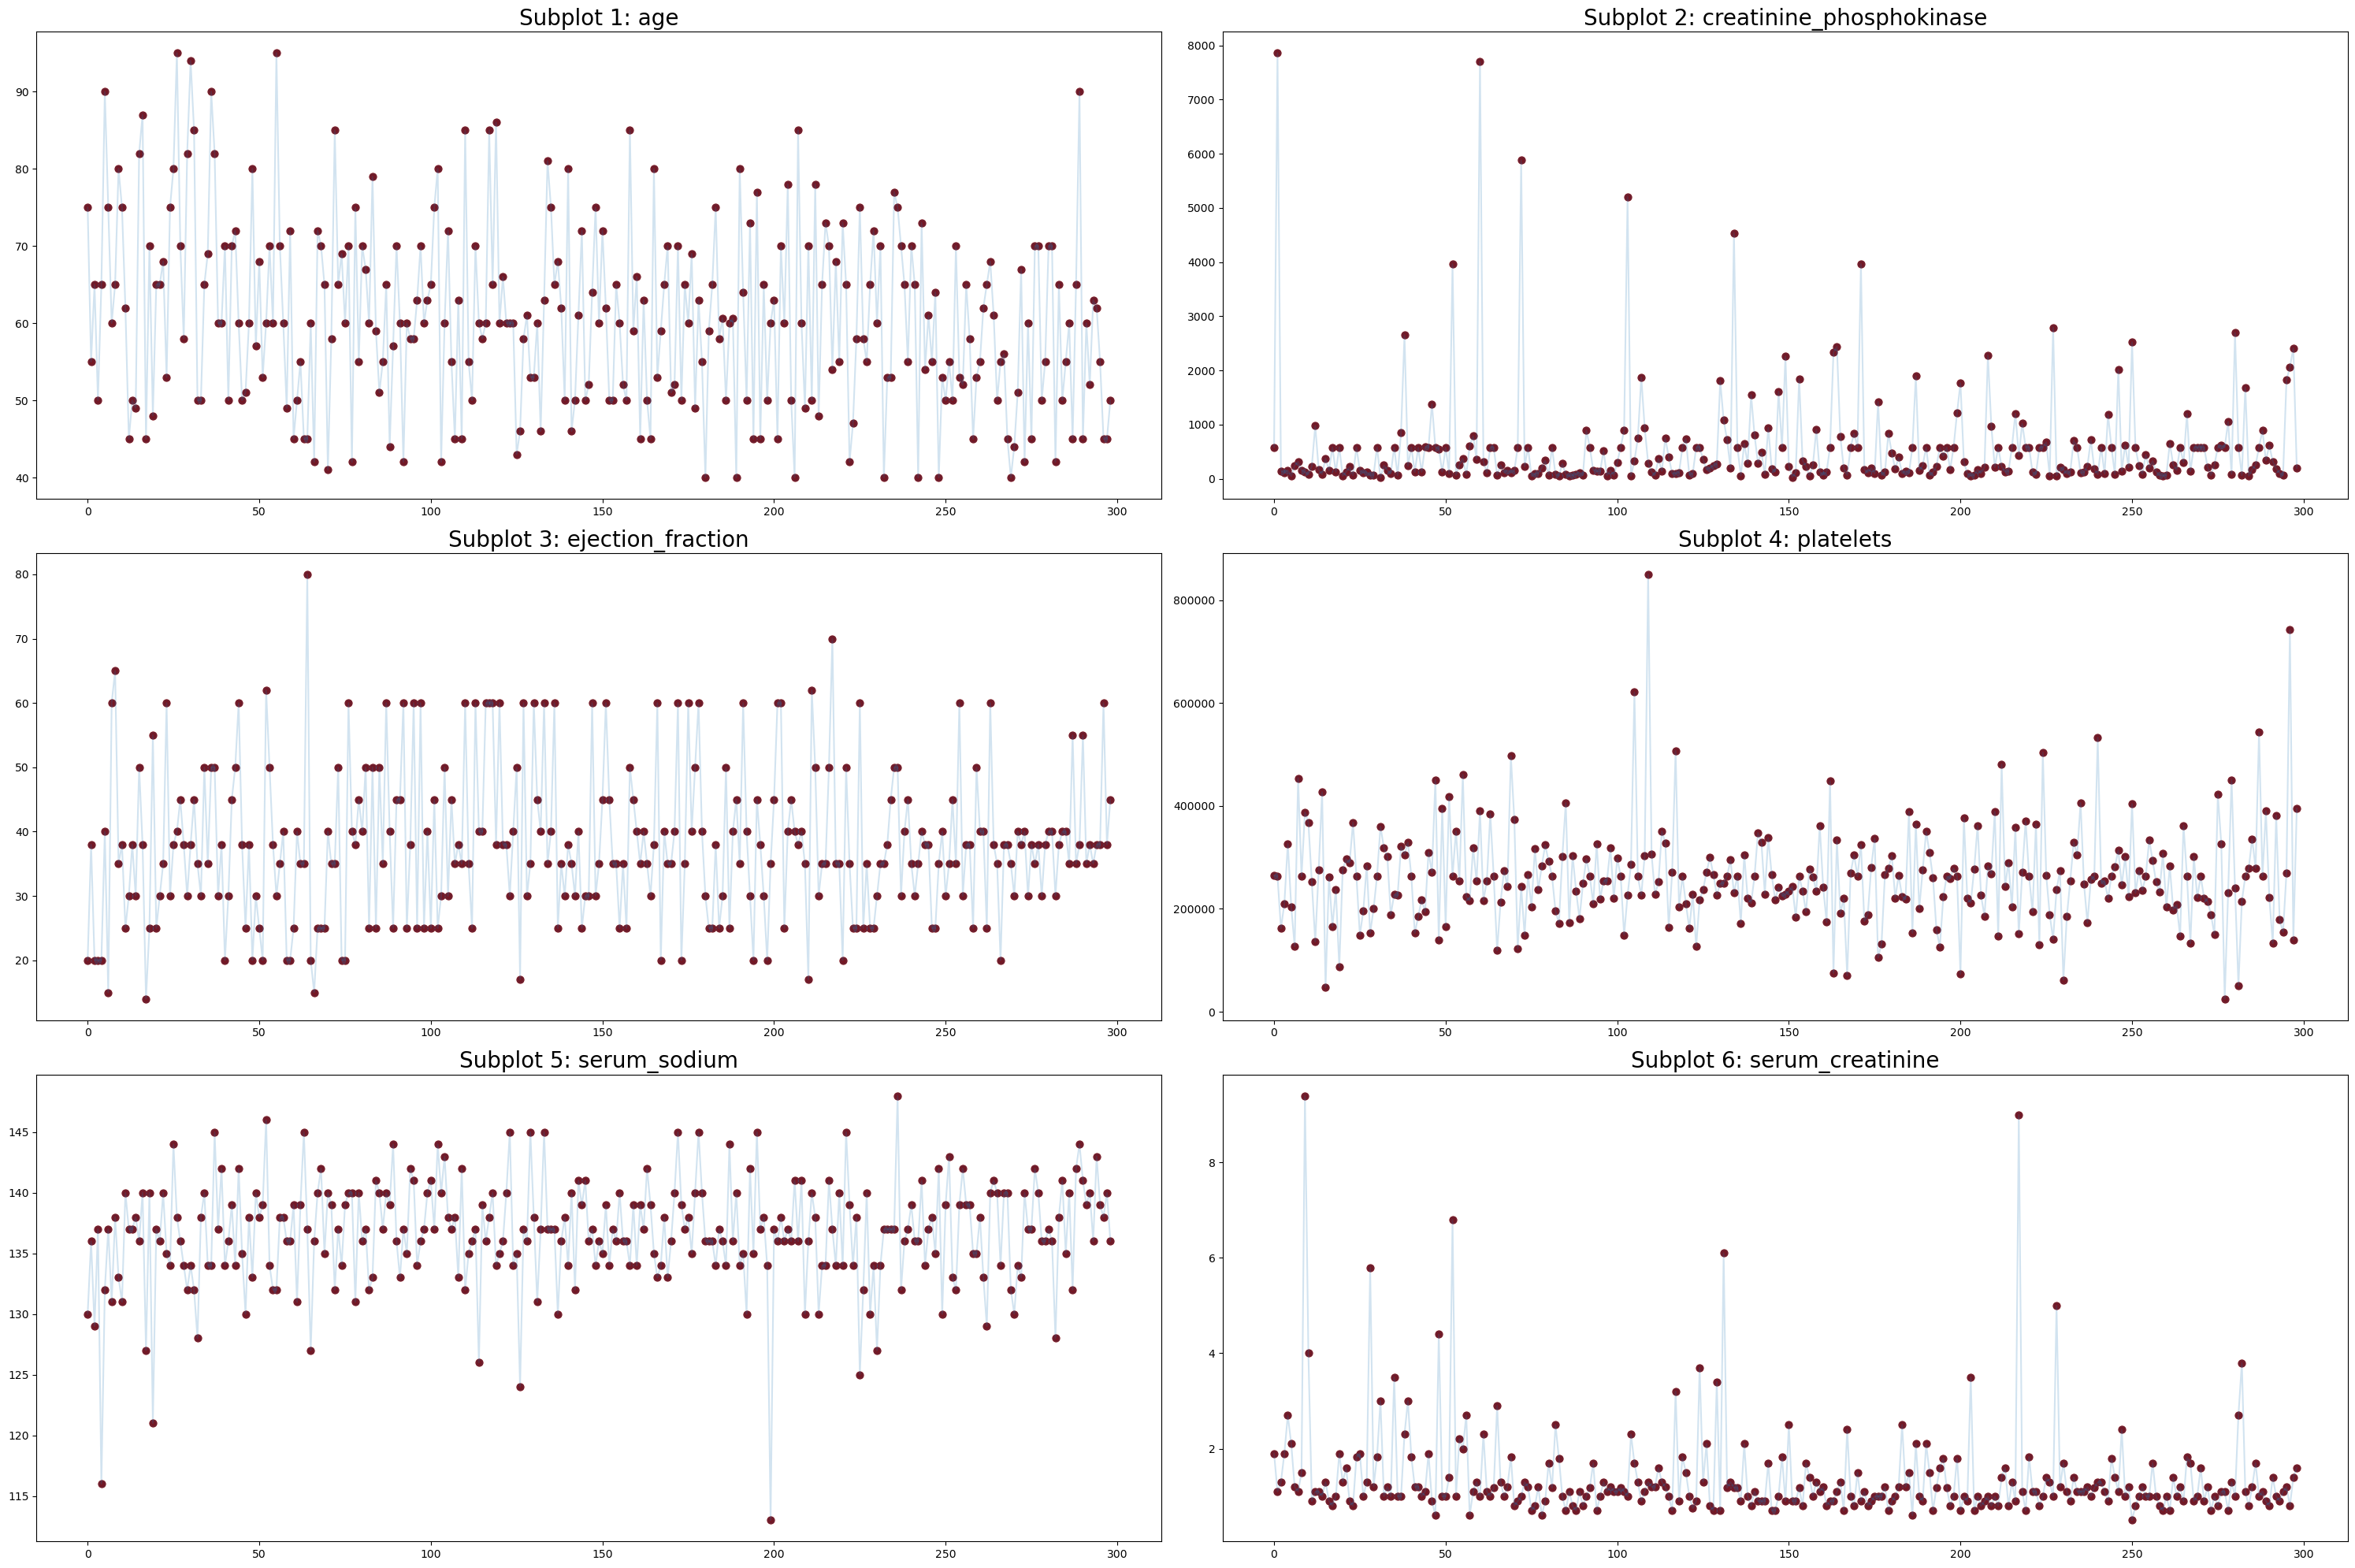

In [50]:
fig,ax = plt.subplots(nrows=3,
                     ncols=2,
                     figsize=(30,20))

for i, col in enumerate(numerics):
    df.loc[:, col].T.plot(legend=False, ax=ax[i // 2, i % 2], marker='o', alpha=0.2, label=f'Line {col}')
    
    ax[i // 2, i % 2].scatter(range(len(df)), df.loc[:, col], marker='o', alpha=1, color='darkred', s=40, label=f'Points {col}')
    ax[i // 2, i % 2].set_title(f'Subplot {i + 1}: {col}',fontsize=20)

plt.tight_layout()
plt.show()

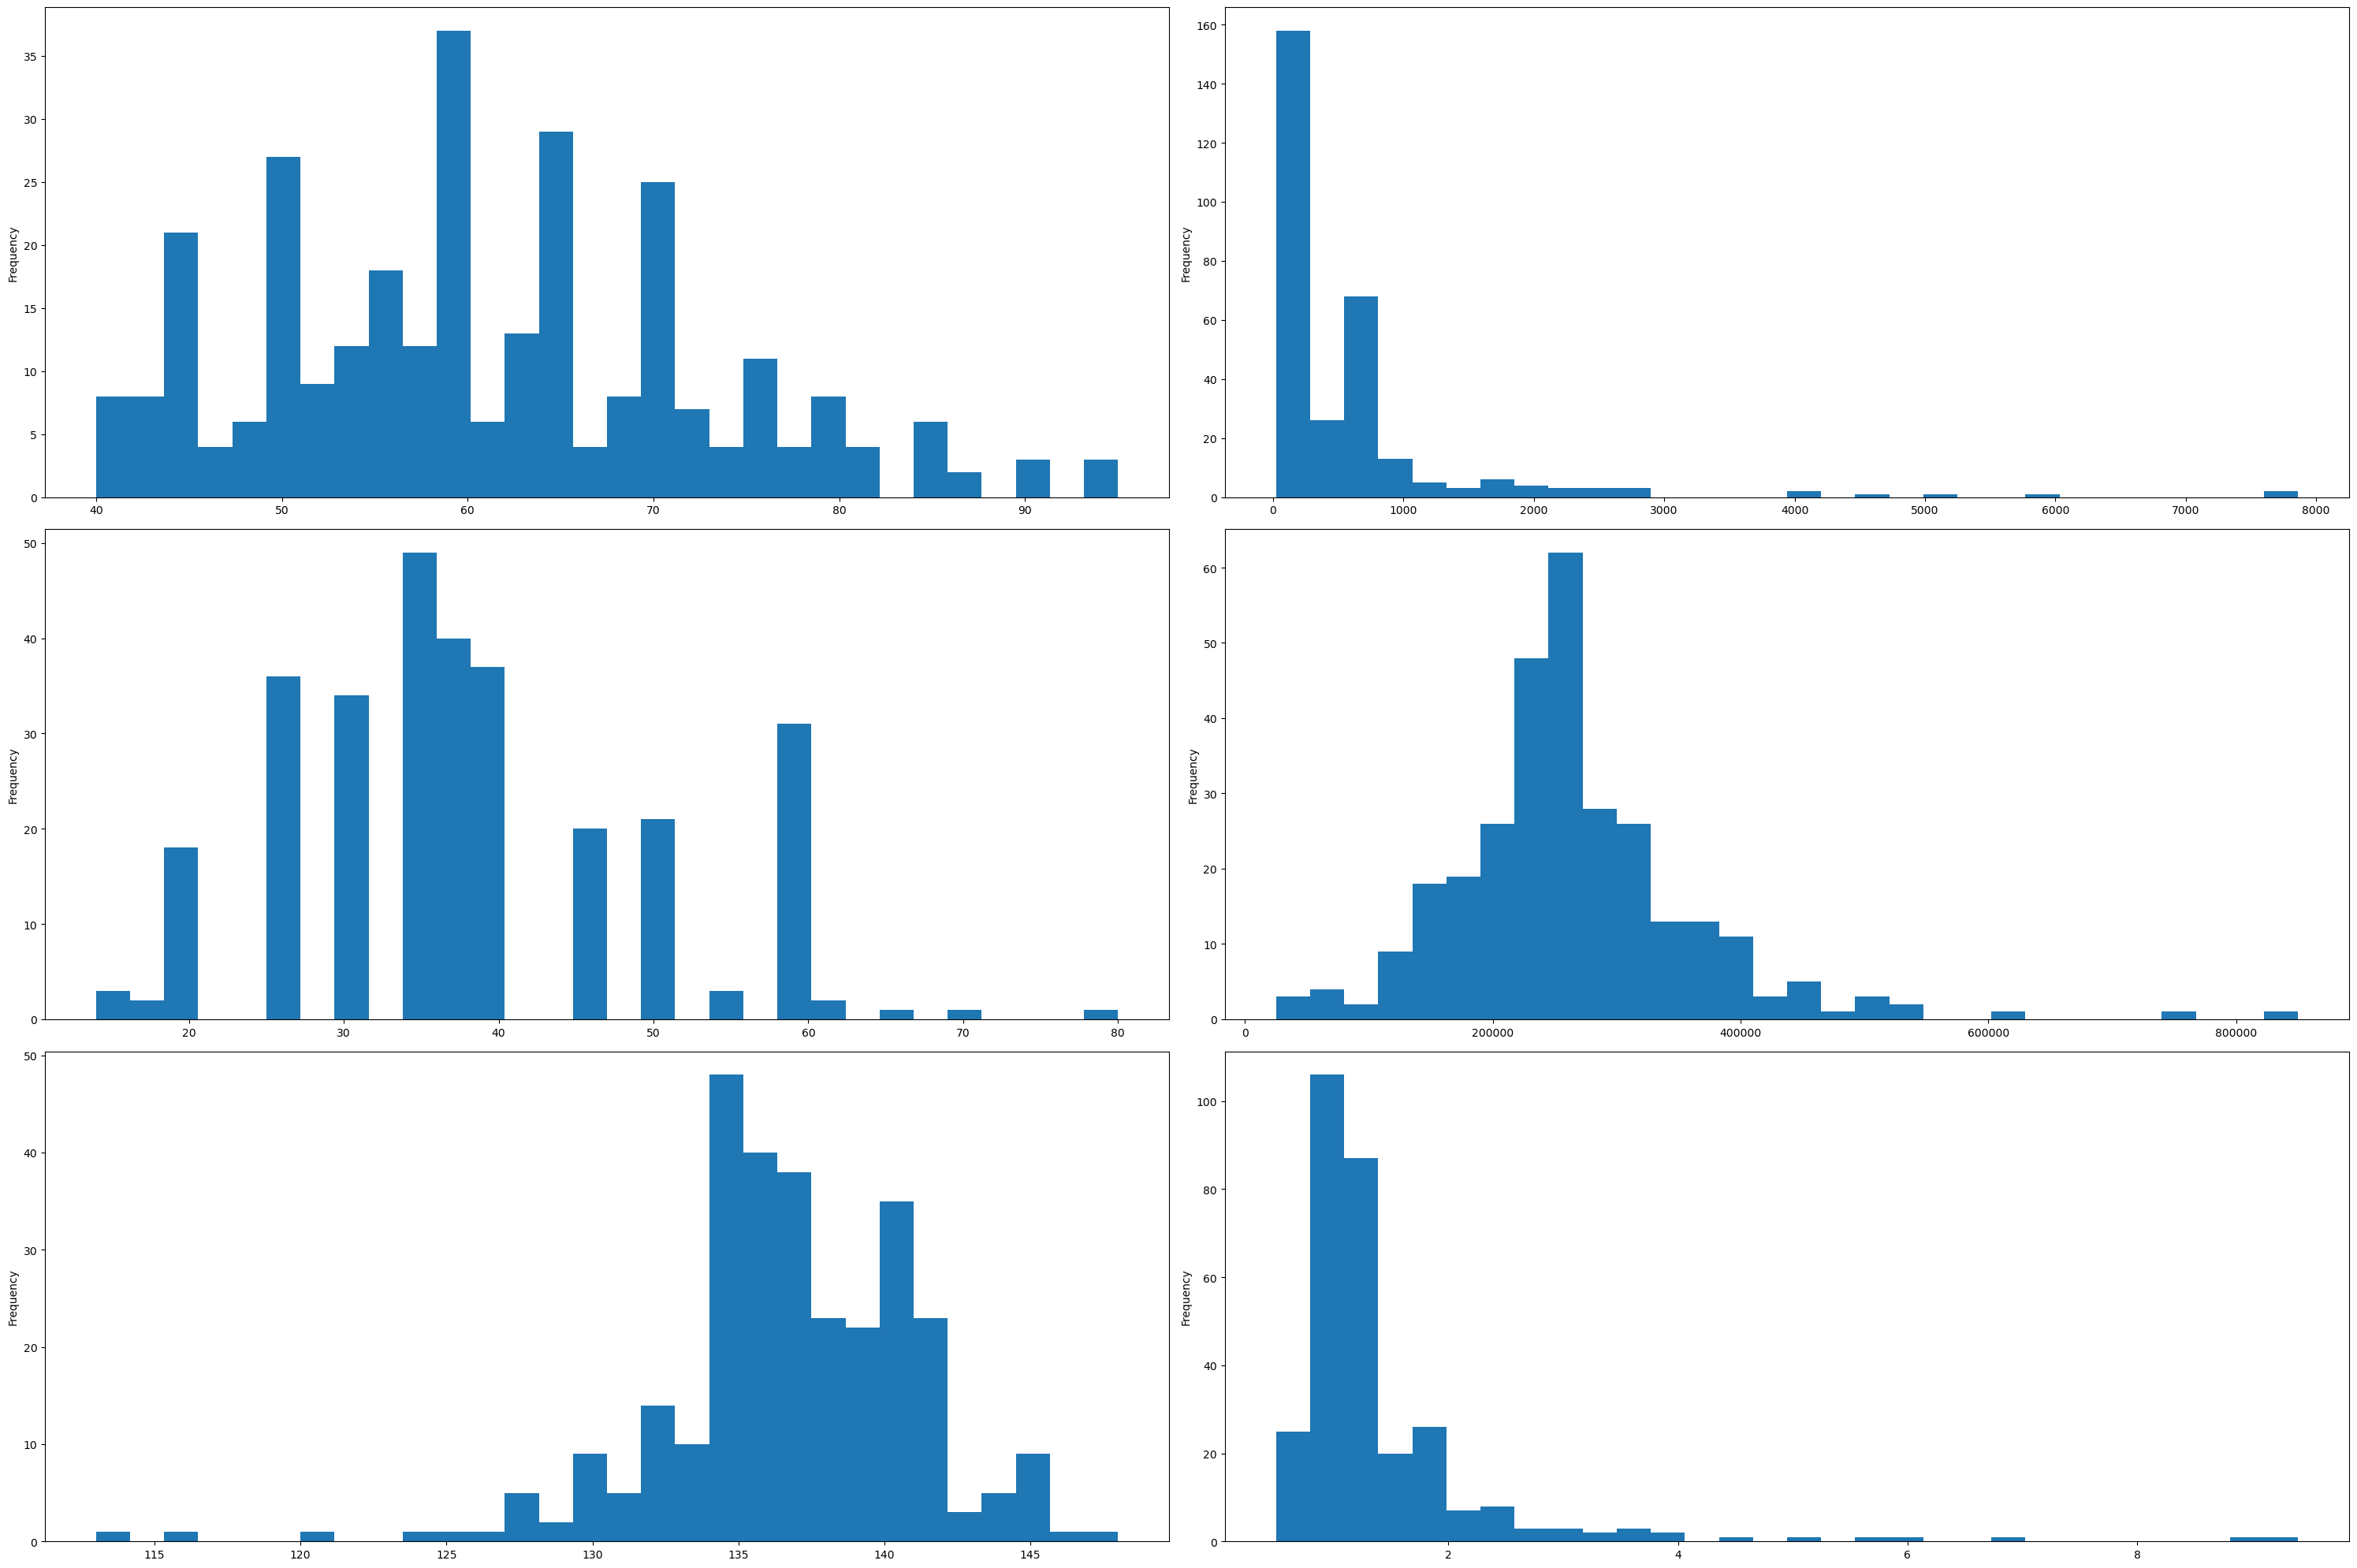

In [51]:
fig,ax = plt.subplots(nrows=3,
                     ncols=2,
                     figsize=(30,20))

for i, col in enumerate(numerics):
    df.loc[:, col].T.plot(legend=False, kind='hist', ax=ax[i // 2, i % 2], label=f'Line {col}', bins=30)

plt.tight_layout()
plt.show()

### split dataset in train- and testset

In [52]:
df_train, df_test = train_test_split(df,
                                     test_size=0.2,
                                     random_state=42)

df_train = df_train.reset_index()
df_test = df_test.reset_index()

### identify extremly gross outliers in the traindataset

In [53]:
df_robust_outliers_mask = df_train.copy()

for col in numerics:
    distance_to_median = df_robust_outliers_mask[col].T - df_robust_outliers_mask[col].median(axis=0)
    absolute_distance_to_median = distance_to_median.abs()
    mad_distance_to_median = absolute_distance_to_median / mad(df_robust_outliers_mask[col],axis=0)
    
    mask_robust_outliers = mad_distance_to_median.T >=6
    
    df_robust_outliers_mask[col] = mask_robust_outliers
    
# saving the index of the outliers    
index_with_outliers = list(np.where(df_robust_outliers_mask[numerics]==True))[0]
index_with_outliers = list(set(index_with_outliers))
df_robust_outliers_mask.head(15)

,index,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,6,False,1,False,0,False,0,False,False,False,1,0,1
1,183,False,0,False,0,False,1,False,False,False,1,0,1
2,185,False,1,False,1,False,0,False,False,False,1,0,1
3,146,False,0,False,0,False,0,False,False,False,1,1,0
4,30,False,0,False,1,False,1,False,False,False,1,0,1
5,22,False,1,False,0,False,1,False,False,False,1,1,1
6,254,False,1,False,0,False,1,False,False,False,1,0,0
7,56,False,1,False,0,False,0,False,False,False,1,1,0
8,237,False,0,False,0,False,0,False,False,False,1,0,0
9,285,False,1,False,1,False,0,False,False,False,1,0,0


### how many extremly gross outliers are in the numerics?

In [54]:
for col in numerics:
    display(pd.crosstab(index=df_robust_outliers_mask[col],columns='count'))
    print("------------------------")

col_0,count
age,
False,239


------------------------


col_0,count
creatinine_phosphokinase,
False,220
True,19


------------------------


col_0,count
ejection_fraction,
False,239


------------------------


col_0,count
platelets,
False,238
True,1


------------------------


col_0,count
serum_sodium,
False,239


------------------------


col_0,count
serum_creatinine,
False,224
True,15


------------------------


### removing detected outliers

In [55]:
df_train_filtered = df_train.drop(index_with_outliers)
df_train_filtered = df_train_filtered.drop("index",axis=1)

df_train_filtered.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,61.239485,0.456311,358.014563,0.417476,38.422330,0.373786,261777.118981,1.181650,136.393204,0.640777,0.315534,0.271845
std,11.964257,0.499301,339.583209,0.494344,11.678259,0.484987,88947.617331,0.406257,4.447609,0.480942,0.465860,0.445994
min,40.000000,0.000000,30.000000,0.000000,15.000000,0.000000,47000.000000,0.600000,113.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,111.250000,0.000000,30.000000,0.000000,211500.000000,0.900000,134.000000,0.000000,0.000000,0.000000
50%,60.333500,0.000000,216.500000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,301500.000000,1.300000,139.000000,1.000000,1.000000,1.000000
max,95.000000,1.000000,1808.000000,1.000000,80.000000,1.000000,621000.000000,2.700000,145.000000,1.000000,1.000000,1.000000


### split the train- and testset into targets and features

In [56]:
target_train = df_train_filtered[['DEATH_EVENT']]
features_train = df_train_filtered.drop('DEATH_EVENT',axis=1)

target_test = df_test[['DEATH_EVENT']]
features_test = df_test.drop(['DEATH_EVENT','index'],axis=1)

print(target_train.shape, features_train.shape, target_test.shape, features_test.shape)

(206, 1) (206, 11) (60, 1) (60, 11)


In [57]:
#wird nicht mehr gemacht, da das erstmal in den Pipelines implementiert ist

# #Da die Zielvariable unausgeglichen ist, wird eine Sampling-Methode angewandt
# # nur für den Trainingsdatensatz

# from imblearn.over_sampling import SMOTE

# smotesampler = SMOTE(random_state=42)

# features_train_smote, target_train_smote = smotesampler.fit_resample(features_train,target_train)

# pd.crosstab(index=target_train_smote,
#            columns='count')

# features_train_smote = features_train_smote.drop('index',axis=1)
# features_test = features_test.drop('index', axis=1)

### function for Scaling all datasets

In [58]:
def standardize_dataframe(train_df, test_df, aim_df):
    """
    This function accepts three DataFrames 'train_df', 'test_df', 'aim_df',
    performs the standardization for all columns

    Parameters:
    train_df (pd.DataFrame): The input data frame for the training set.
    test_df (pd.DataFrame): The input data frame for the test set.
    aim_df (pd.DataFrame): The input data frame for the target set.

    Return value:
    features_train_scaled: The standardized DataFrame for the training set.
    features_test_scaled: The standardized DataFrame for the test set.
    features_aim_scaled: The standardized DataFrame for the target set
    """
    
    all_columns = train_df.columns.tolist()

    scaler = StandardScaler()
    train_df_scaled = scaler.fit_transform(train_df)

    train_df_scaled = pd.DataFrame(train_df_scaled, columns=all_columns)

    test_df_scaled = scaler.transform(test_df)
    aim_df_scaled = scaler.transform(aim_df)

    test_df_scaled = pd.DataFrame(test_df_scaled, columns=all_columns)
    aim_df_scaled = pd.DataFrame(aim_df_scaled, columns=all_columns)
    

    return train_df_scaled, test_df_scaled, aim_df_scaled

features_train_scaled, features_test_scaled, features_aim_scaled =standardize_dataframe(features_train,features_test,df_aim)


### function for evaluating the models

In [59]:
def evaluate_model(name, model, features, target):
    """
    Evaluates a trained model using various metrics and outputs the results.

    Parameters:
    name (str): A name or description of the model for the output.
    model: The trained model to be evaluated.
    features: The input features on which the model is to be tested.
    target: The target variables to be used for the evaluation.

    Return value:
    dict: A dictionary with the evaluated metrics ('name', 'precision', 'recall', 'f1', accuracy).
    """
    y_pred = model.predict(features)
    
    precision = precision_score(target, y_pred)
    recall = recall_score(target, y_pred)
    f1 = f1_score(target, y_pred)
    accuracy = accuracy_score(target, y_pred)
    
    print(name.upper())
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)
    print(model)
    print('#' * 11)
    
    return {'name': name, 'precision': precision, 'recall': recall, 'f1': f1, 'accuracy': accuracy}


### logistic Regression

In [60]:
samplers = [('class_weights', 'balanced'),
            ('SMOTE', SMOTE(random_state=42))
           ]

result_log = []

for sampler_name, sampler in samplers:
    if sampler_name == 'class_weights':
        current_pipeline = Pipeline([
            ('classifier', LogisticRegression(solver='saga',
                                              max_iter=5000, 
                                              random_state=42,
                                              class_weight='balanced'))
        ])
    else:
        current_pipeline = Pipeline([
            ('sampler', sampler), 
            ('classifier', LogisticRegression(solver='saga',
                                              max_iter=5000, 
                                              random_state=42))
        ])
    
    # Hyperparameter
    C_values = np.geomspace(start=0.1, stop=100, num=10)
    search_space_grid = [{'classifier__penalty': ['l1','l2'],
                          'classifier__C': C_values}]
    
    # Gridsearch
    model_grid_log = GridSearchCV(estimator=current_pipeline,
                                  param_grid=search_space_grid,
                                  scoring='f1',
                                  cv=8,
                                  n_jobs=-1)
    
    model_grid_log.fit(features_train_scaled, target_train)
    
    result_log.append({
        'sampler_name': sampler_name,
        'best_estimator': model_grid_log.best_estimator_,
        'best_score': model_grid_log.best_score_,
        'best_params': model_grid_log.best_params_
    })
    
best_model_logistic_regression = model_grid_log.best_estimator_.named_steps['classifier']

scores_lr = evaluate_model(sampler_name, best_model_logistic_regression, features_test_scaled, target_test)
    
result_log.append(scores_lr)

SMOTE
Precision: 0.6666666666666666
Recall: 0.56
F1 Score: 0.6086956521739131
Accuracy: 0.7
LogisticRegression(max_iter=5000, penalty='l1', random_state=42, solver='saga')
###########


### Decision Tree

In [61]:
tree_clf = DecisionTreeClassifier(random_state=42)

# Parameter-space
search_space = {
    'estimator__max_depth': range(2, 12, 1),
    'estimator__class_weight': [None, 'balanced']
}

# different Sampler
samplers = [
    ('SMOTE_dt', SMOTE(random_state=42)),
    #('class_weights_dt', 'passthrough')
]

results_decision_tree = []

for name, sampler in samplers:
    imb_pipe = imblearn.pipeline.Pipeline([
        ('sampler', sampler),
        ('estimator', tree_clf)
    ])

    model_decision_tree = GridSearchCV(estimator=imb_pipe, 
                             param_grid=search_space,
                             n_jobs=-1,
                             cv=10,
                             scoring='f1')
    
    
    model_decision_tree.fit(features_train_scaled, target_train)
    
    best_model_decision_tree = model_decision_tree.best_estimator_.named_steps['estimator']
    
    scores_dt = evaluate_model(name, best_model_decision_tree, features_test_scaled, target_test)
    
    results_decision_tree.append(scores_dt)


SMOTE_DT
Precision: 0.6956521739130435
Recall: 0.64
F1 Score: 0.6666666666666666
Accuracy: 0.7333333333333333
DecisionTreeClassifier(max_depth=3, random_state=42)
###########


### random forest

In [62]:
search_space_rf = {
    'estimator__max_depth': np.geomspace(start=1, stop=14, num=6, dtype='int'),
    'estimator__min_samples_leaf': np.geomspace(start=5, stop=40, num=10, dtype='int')
}

samplers = [
    #('SMOTE_rf', SMOTE(random_state=42)),
    ('class_weights_rf', 'passthrough')
]

results_random_forest = []

for name, sampler in samplers:
    # Pipeline
    imb_pipe = imblearn.pipeline.Pipeline([
        ('sampler', sampler),
        ('estimator', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
    ])
    
    # Grid-search and cross-validation
    model_rf = GridSearchCV(estimator=imb_pipe,
                            param_grid=search_space_rf,
                            scoring='f1',
                            cv=5)
    
    model_rf.fit(features_train_scaled, target_train)
    
    best_model_rf = model_rf.best_estimator_
    
    scores = evaluate_model(name, best_model_rf, features_test_scaled, target_test)
    
    results_random_forest.append(scores)


CLASS_WEIGHTS_RF
Precision: 0.6842105263157895
Recall: 0.52
F1 Score: 0.5909090909090909
Accuracy: 0.7
Pipeline(steps=[('sampler', 'passthrough'),
                ('estimator',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        min_samples_leaf=7, random_state=42))])
###########


Epoch 1/20
4/4 [==============================] - 2s 116ms/step - loss: 0.6643 - accuracy: 0.7282 - val_loss: 0.7112 - val_accuracy: 0.5833
Epoch 2/20
4/4 [==============================] - 0s 23ms/step - loss: 0.6308 - accuracy: 0.7282 - val_loss: 0.7412 - val_accuracy: 0.5833
Epoch 3/20
4/4 [==============================] - 0s 21ms/step - loss: 0.5965 - accuracy: 0.7282 - val_loss: 0.7905 - val_accuracy: 0.5833
Epoch 4/20
4/4 [==============================] - 0s 28ms/step - loss: 0.5603 - accuracy: 0.7282 - val_loss: 0.8662 - val_accuracy: 0.5833
Epoch 5/20
4/4 [==============================] - 0s 23ms/step - loss: 0.5373 - accuracy: 0.7282 - val_loss: 0.9671 - val_accuracy: 0.5833
Epoch 6/20
4/4 [==============================] - 0s 23ms/step - loss: 0.5210 - accuracy: 0.7282 - val_loss: 1.0307 - val_accuracy: 0.5833
Epoch 7/20
4/4 [==============================] - 0s 22ms/step - loss: 0.5016 - accuracy: 0.7282 - val_loss: 1.0054 - val_accuracy: 0.5833
Epoch 8/20
4/4 [==========

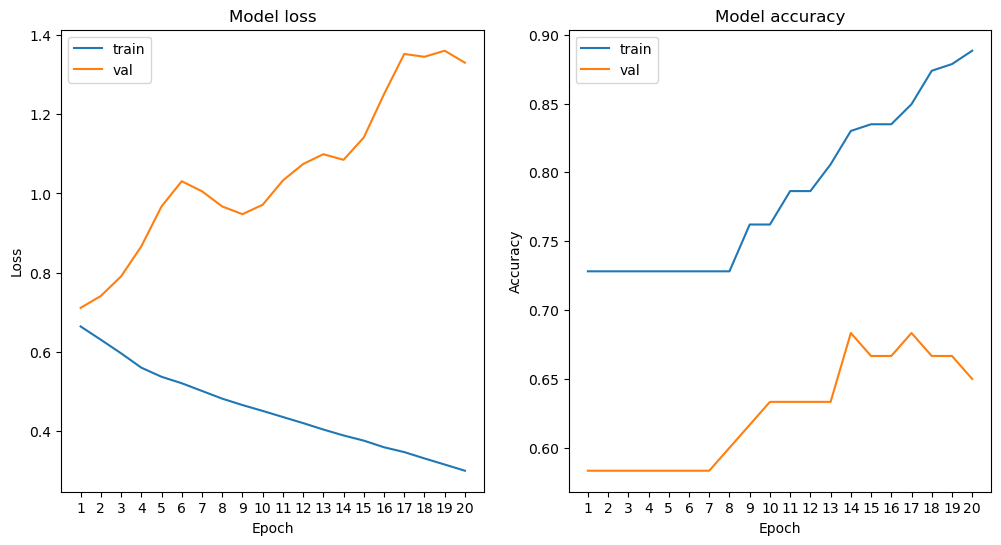

In [63]:
model_ann_pca = Sequential()

early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=10)

# define the hidden layers
hidden_first = Dense(units=50, activation='relu', input_dim=features_train_scaled.shape[1])
hidden_second = Dense(units=50, activation='relu')
hidden_third = Dense(units=50, activation='relu')
hidden_fourth = Dense(units=50, activation='relu')
hidden_fifth = Dense(units=50, activation='relu')

# add the hidden layers
model_ann_pca.add(hidden_first)
model_ann_pca.add(hidden_second)
model_ann_pca.add(hidden_third)
model_ann_pca.add(hidden_fourth)
model_ann_pca.add(hidden_fifth)

output_layer_pca = Dense(units=1, activation='sigmoid')
model_ann_pca.add(output_layer_pca)

model_ann_pca.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

hist_ann_pca = model_ann_pca.fit(features_train_scaled, target_train, epochs=20, callbacks=[early_stop], batch_size=64, validation_data=(features_test_scaled, target_test))



# define figure and axes
fig, axs = plt.subplots(ncols=2, figsize=(12,6))

# plot training & validation loss values
axs[0].plot(hist_ann_pca.history['loss'])
axs[0].plot(hist_ann_pca.history['val_loss'])
axs[0].set(title='Model loss', ylabel='Loss', xlabel='Epoch')
axs[0].legend(['train', 'val'])
axs[0].set_xticks(range(20))
axs[0].set_xticklabels(range(1, 21))

# plot training & validation accuracy values
axs[1].plot(hist_ann_pca.history['accuracy'])
axs[1].plot(hist_ann_pca.history['val_accuracy'])
axs[1].set(title='Model accuracy', ylabel='Accuracy', xlabel='Epoch')
axs[1].legend(['train', 'val'], loc='upper left')
axs[1].set_xticks(range(20))
axs[1].set_xticklabels(range(1, 21));

In [64]:
import joblib

joblib.dump(model_grid_log.best_estimator_, 'best_logistic_regression_model.pkl')
model_ann_pca.save('best_neuronal_netz_model.h5')
joblib.dump(model_rf.best_estimator_, 'best_random_forest_model.pkl')
joblib.dump(model_decision_tree.best_estimator_, 'best_decision_tree_less.pkl')

['best_decision_tree_less.pkl']

In [65]:
target_test_pred_log_dummy = model_grid_log.predict(features_test_scaled)

precision_log_dummy = precision_score(target_test, target_test_pred_log_dummy)
recall_log_dummy = recall_score(target_test, target_test_pred_log_dummy)
f1_log_dummy =  2 * (precision_log_dummy * recall_log_dummy) / (precision_log_dummy + recall_log_dummy)
accuracy_log_dummy = accuracy_score(target_test, target_test_pred_log_dummy)

results = pd.DataFrame(columns=['name','precision','recall','f1','accuracy'])

results.loc[0,:] = 'Logistic Regression', precision_log_dummy, recall_log_dummy, f1_log_dummy, accuracy_log_dummy

###############################################
# prediction RF
target_test_pred_rf = model_rf.predict(features_test_scaled)

precision_rf = precision_score(target_test, target_test_pred_rf)
recall_rf = recall_score(target_test, target_test_pred_rf)
accuracy_rf = accuracy_score(target_test, target_test_pred_rf)

results.loc[1,:] = 'Random Forest',precision_rf,recall_rf,model_rf.best_score_, accuracy_rf

###############################################
# prediction DT
target_test_pred_dt = model_decision_tree.predict(features_test_scaled)

precision_dt = precision_score(target_test, target_test_pred_dt)
recall_dt = recall_score(target_test, target_test_pred_dt)
accuracy_dt = accuracy_score(target_test, target_test_pred_dt)

results.loc[2,:] = 'Decision Tree',precision_dt,recall_dt,model_decision_tree.best_score_, accuracy_dt

###############################################
#prediction KNN
y_pred = model_ann_pca.predict(features_test_scaled)

threshold = 0.5

y_pred_binary = (y_pred > threshold).astype(int)

precision_knn = precision_score(target_test, y_pred_binary)
recall_knn = recall_score(target_test, y_pred_binary)
f1_knn = f1_score(target_test, y_pred_binary)

results.loc[3,:] = 'KN Netz',precision_knn,recall_knn,f1_knn, model_ann_pca.evaluate(features_test_scaled,target_test)[1]

results = results.reset_index(drop=True)
results = results.set_index("name")
display(results)

2/2 [==============================] - 0s 17ms/step - loss: 1.3298 - accuracy: 0.6500


,precision,recall,f1,accuracy
name,,,,
Logistic Regression,0.666667,0.56,0.608696,0.7
Random Forest,0.684211,0.52,0.614403,0.7
Decision Tree,0.695652,0.64,0.609719,0.733333
KN Netz,0.642857,0.36,0.461538,0.65


In [66]:
results=results.T

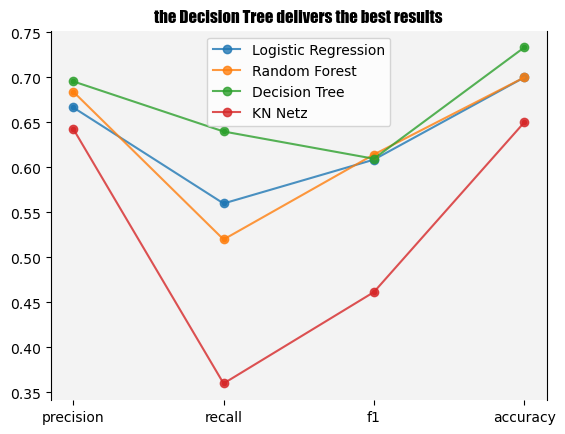

In [67]:
fig, ax1 = plt.subplots()


for col in results:
    ax1.plot(results.index, results[col], label=col, marker='o',alpha=0.8)
    ax1.scatter(results.index,results[col],s=10)
    ax1.legend(loc='upper center')
    ax1.spines[['top','bottom']].set_visible(False)
    
    
    ax1.set_title(label='the Decision Tree delivers the best results',fontdict={'color':'black',
                                      'backgroundcolor': 'white',
                                      'fontfamily': 'fantasy',
                                      'fontsize': 12,
                                      'fontstretch': 'extra-expanded',
                                      'fontstyle': 'italic',})

plt.gca().set_facecolor((0.1, 0.1, 0.1, 0.05))
plt.show()

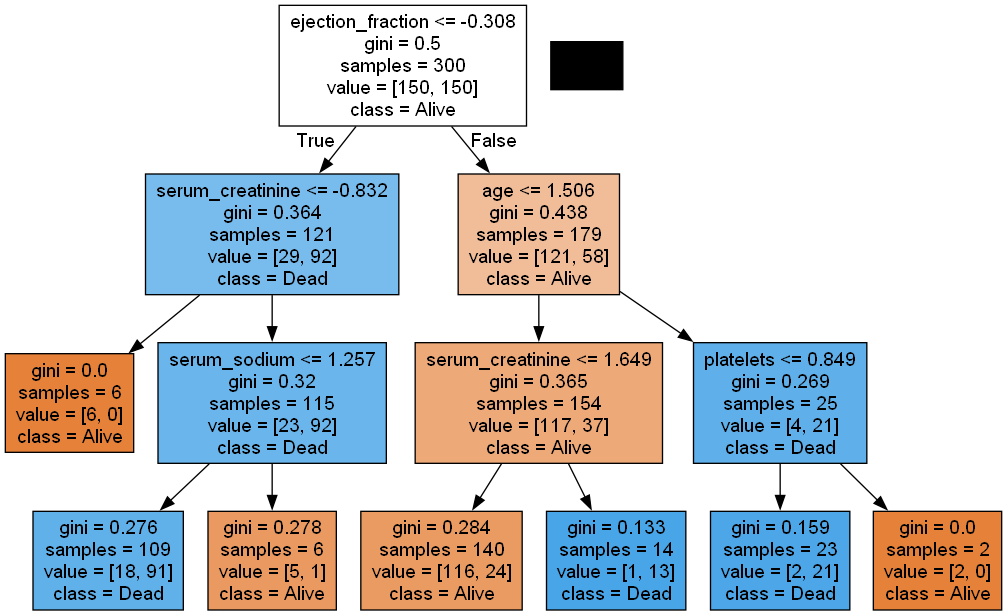

In [68]:
best_model_decision_tree = model_decision_tree.best_estimator_.named_steps['estimator']


tree_string = export_graphviz(decision_tree=best_model_decision_tree,
                              feature_names=features_train_scaled.columns,
                              class_names=['Alive','Dead'],
                              filled=True,
                              impurity=True)
graph = graph_from_dot_data(tree_string)
graph.write_png('decision_tree.png') 
Image('decision_tree.png')

In [69]:
feature_importance = pd.Series(data=best_model_decision_tree.feature_importances_,
                               index=features_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

ejection_fraction           0.376553
serum_creatinine            0.299892
age                         0.211961
serum_sodium                0.069568
platelets                   0.042026
anaemia                     0.000000
creatinine_phosphokinase    0.000000
diabetes                    0.000000
high_blood_pressure         0.000000
sex                         0.000000
smoking                     0.000000
dtype: float64

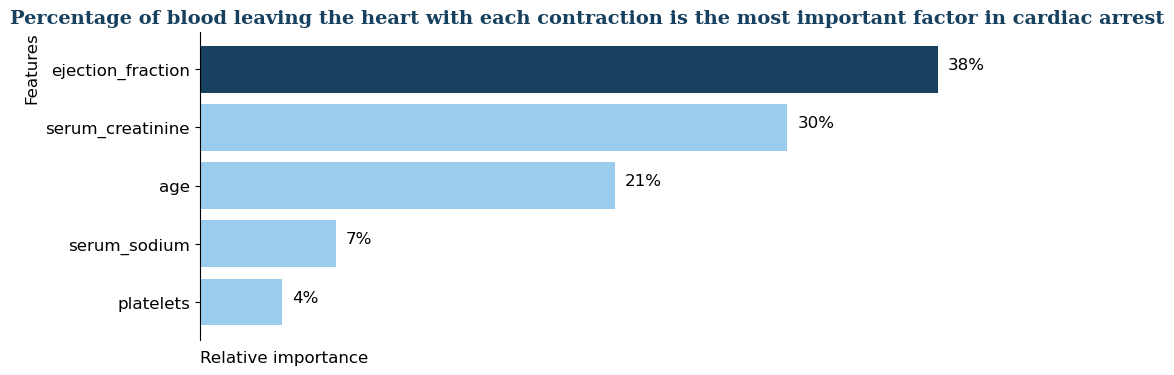

In [70]:
colors = ['#99cced']*4 + ['#17415f']
fig, ax = plt.subplots(figsize=(10, 4))
mask = feature_importance > 0
feature_importance = feature_importance.loc[mask]
feature_importance = feature_importance.sort_values()
feature_importance.plot(kind='barh', color=colors, width=0.8);
ax.set_title(label='Percentage of blood leaving the heart with each contraction is the most important factor in cardiac arrest',
             family='serif',
             color=colors[-1],
             weight='semibold',
             size=14
            )
ax.set_xlabel('Relative importance',
              size=12, position=[0, 0],
              horizontalalignment='left'
             )
ax.set_ylabel('Features',
              size=12, position=[0, 1],
              horizontalalignment='right'
             );
ax.set_yticklabels(ax.get_yticklabels(), size=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for idx in range(len(feature_importance.index)):
    ax.text(s='{}%'.format(round(100*feature_importance.iloc[idx]),1),
            x=feature_importance.iloc[idx]+0.005,
            y=idx, size=12,
            color='black'
           )
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_xticklabels([]);

plt.savefig("Heart.jpg",bbox_inches='tight')
plt.show()